In [4]:
import numpy as np
import os 
import cv2 
from matplotlib import pyplot as plt
import difflib

In [114]:
xz=0				   #Переменная нужна для создания уникальных файлов. 
def sim_xyz(c,x, img):
#Аргумент с-определение угла по ХZ в системе координат XYZ.
# Аргумент х- определение угла по YZ в системе координат XYZ.
    global xz
    hieght,width = img.shape[:2]			      #Высота и ширина изображения.
    for i in range(100):					   #Цикл для прогона скрипта.
        xz+=1      
# Отражение по оси XYZ.
        M = np.float32([[1,c,0],[x,1,0],[0,0,1]])		          #Преобразование углов. 
        res = cv2.warpPerspective(img, M,(int(hieght*2.3), int(width*2)))            #Объект подставляем в преобразованные углы.
        cv2.imwrite(r'/home/gea/TMS_projects/train/'+str(xz)+'_sim.png', res)   #Сохраняем измененное изображение. 
        xz+=1
# Зеркальное отражение. 
        flip_img = cv2.flip(res,1)				        #Отображаем зеркально. 
        cv2.imwrite(r'/home/gea/TMS_projects/train/'+str(xz)+'_sim.png', flip_img)  #Сохраняем объект. 
        xz+=1  
# Отображение по углам от -180 до 180 оси XY.         
        center = (width/2, hieght/2) 					#Высчитываем центр. 
        for i in range(0, 45, 10):    #Для каждго объекта будет применен угол от 0 до 45 по оси XY.       
            xz+=1
            m = cv2.getRotationMatrix2D(center, i, 1.0)#Вращение относительно центра на заданный угол. 
            rotated = cv2.warpAffine(res, m, (int(width*2.3),int(hieght*2)))      #Подставляем объект в заданные параметры. 
            flip_img_rot = cv2.flip(rotated,1)	      #Зеркальное отображение для каждого шага.
            cv2.imwrite(r'/home/gea/TMS_projects/train/'+str(xz)+'_sim.png', rotated) #Сохраняем. 
            xz+=1
            cv2.imwrite(r'/home/gea/TMS_projects/train/'+str(xz)+'_sim.png', flip_img_rot)						        #Сохраняем зеркальное отображение.  
        if c != 0:#Условие для изменения углов В оси  XYZ.
            c+=0.06
        if x != 0:
            x+=0.06
        if c >0.5 or x>0.5: # Если угол больше 0.5 выполнение цикла останавливается.
            break 
directory = os.listdir(r'/home/gea/TMS_projects/train/')#Находим список необходимых файлов для поиска.
image = cv2.imread(r'/home/gea/TMS_projects/train/bad.jpg')
sim_xyz(c=0.02, x=0,img=image)
sim_xyz(c=0, x=0.02,img=image)
sim_xyz(c=0.02, x=0.02,img=image)
# for file in directory: 			#Берем каждый файл из списка по отдельности.
#     image = cv2.imread(r'C:\Users\Desktop\data_train\\'+file)
#     sim_xyz(c=0.02, x=0,img=image)
#     sim_xyz(c=0, x=0.02,img=image)
#     sim_xyz(c=0.02, x=0.02,img=image)

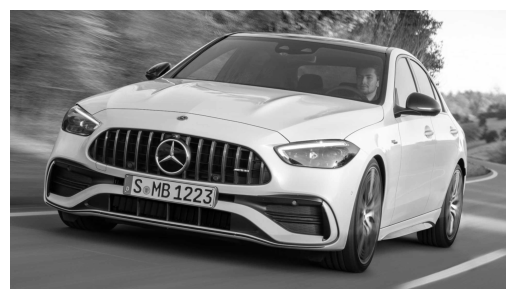

In [19]:
xz = 0
data_exit = os.listdir('/home/gea/TMS_projects/train2/') 	    		  #Папка с файлами, которые ищем.

src = cv2.imread(r'/home/gea/TMS_projects/mers.jpg')         #Читаем файл
#src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)	             #Переводим изображение в оттенки  серого. 
gray = cv2.imread(r'/home/gea/TMS_projects/mers.jpg', cv2.IMREAD_GRAYSCALE) 
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

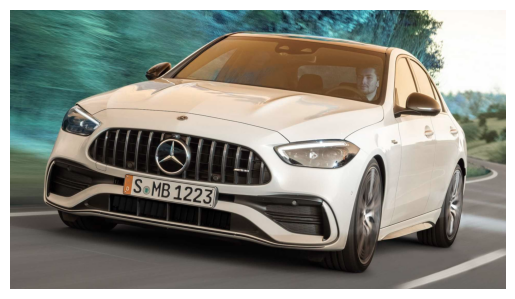

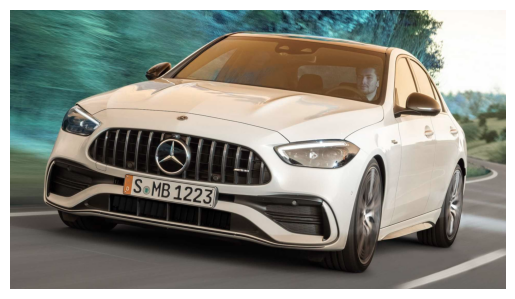

In [21]:
data_exit = os.listdir('/home/gea/TMS_projects/train2/')
gray = cv2.imread(r'/home/gea/TMS_projects/mers.jpg', cv2.IMREAD_GRAYSCALE) 
#gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)	

i = 0					     #переменная счетчик для количества проходов.
for exit in data_exit:	             #Цикл начинает брать все файлы из папки, которые ищем.  
    a = [[[[]]]] 						             #Переменная для проверки.                
    gray_1 = cv2.imread(r'/home/gea/TMS_projects/train2/'+exit, cv2.IMREAD_GRAYSCALE)	  	           #Читаем файл.  

    try: 								             #Обработка ошибок. 
        src.shape
    except AttributeError:
        continue            
    #gray_1 = cv2.cvtColor(img__1, cv2.COLOR_BGR2GRAY) #Каждый файл переводим в оттенки серого. 
    w,h = gray_1.shape[::-1]					       #Записываем размер изображения. 
    res = cv2.matchTemplate(gray, gray_1, cv2.TM_CCOEFF_NORMED)  #Сопоставляем шаблоны. 
    threshould = 0.50 						          #Пороговое значение.
    loc = np.where(res>=threshould)#Сохраняем в переменную значения, больше
    for pt in zip(*loc[::-1]): 					          #Выбираем каждое значение. 
        cv2.rectangle(src, pt, (pt[0]+w, pt[1]+h), (0,0,255), 2)		         #Рисуем рамку.
    #    break
    #i +=1
    #if a[0][0][0] == []:				           #Проверка на наличие рисунка на изображении. 
    #    continue
    #else:
    xz+=1
    # cv2.imshow('sta', src)
    # cv2.waitKey(0)
    plt.imshow(src)
    plt.axis('off')
    plt.show()
    
    sk_marked = r'/home/gea/TMS_projects/train2/'#Ссылка на изображение.
    cv2.imwrite(r'/home/gea/TMS_projects/train2/'+str(xz)+'_marked.png', src)#Сохраняем изображение.
    break
#xz+=1
#cv2.imshow('sta', src)
#cv2.waitKey(0)
plt.imshow(src)
plt.axis('off')
plt.show()

#sk_marked = r'/home/gea/TMS_projects/train2/mers.jpg'#Ссылка на изображение.
#cv2.imwrite(r'/home/gea/TMS_projects/train2/mers.jpg', src)#Сохраняем изображение.


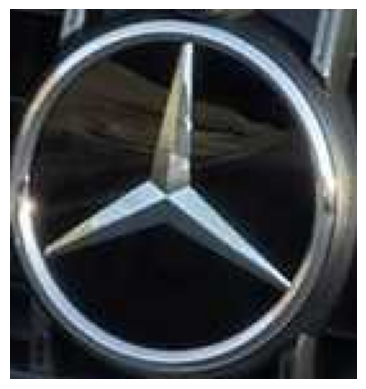

In [20]:
template = cv2.imread('/home/gea/TMS_projects/train/mers_em_2.png')
template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
plt.imshow(template, cmap='gray')
plt.axis('off')
plt.show()

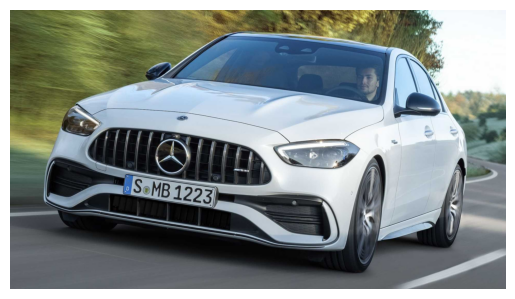

In [12]:
image = cv2.imread('mers.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [57]:
def find_matches(image, template, threshold=0.85):
    # Загрузка изображения и шаблона
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    # Получение ширины и высоты шаблона
    w, h = template_gray.shape[::-1]

    # Применение метода совпадения шаблонов
    res = cv2.matchTemplate(gray, template_gray, cv2.TM_CCOEFF_NORMED)
    
    
    # Получение координат, где совпадение превышает пороговое значение
    loc = np.where(res >= threshold)
    #print(loc)
    for pt in zip(*loc[::-1]):
        cv2.rectangle(image, pt, (pt[0] + w, pt[1] + h), (0, 255, 255), 2)

    # Отображение результата в Jupyter Notebook
    # plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # plt.axis('off')
    # plt.show()
    return loc

5_sim.png


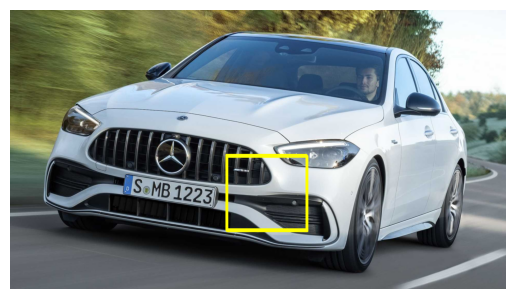

1_sim.png


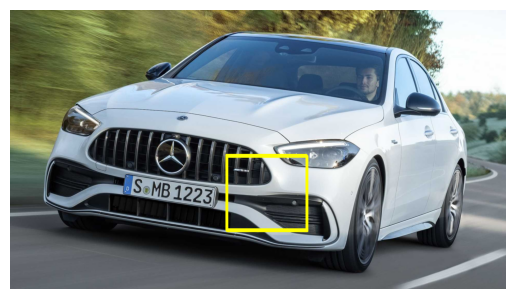

2_sim.png


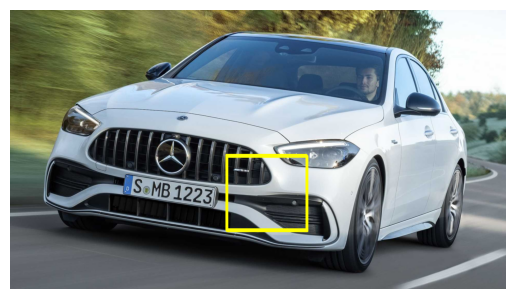

3_sim.png


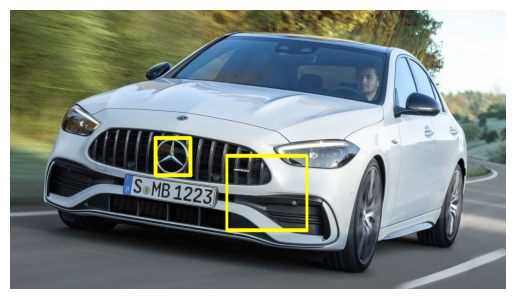

In [59]:
data_exist = os.listdir('/home/gea/TMS_projects/train3/') 	    		  #Папка с файлами, которые ищем.

src = cv2.imread('/home/gea/TMS_projects/mers.jpg')         #Читаем файл

#find_matches(src, template_3)
for file in data_exist:
    template = cv2.imread(r'/home/gea/TMS_projects/train3/'+file)
    print(file)
    if find_matches(src, template, threshold=0.415)!=[]:
        plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
        


# for exit in data_exit:
#     #template = cv2.imread(r'/home/gea/TMS_projects/train2/'+exit)
#     find_matches(src, template)

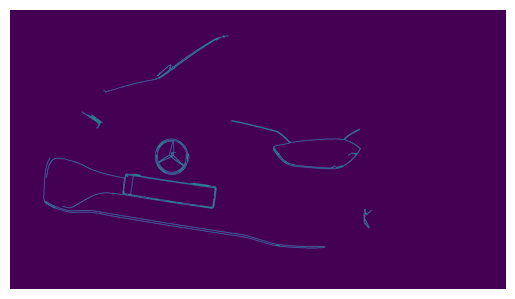

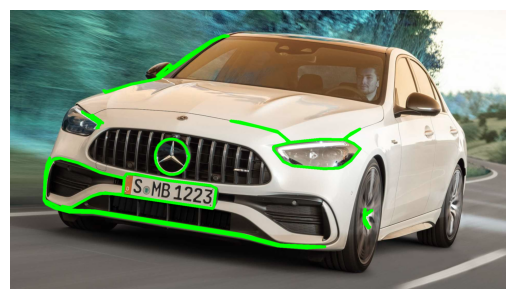

In [38]:
src = cv2.imread('/home/gea/TMS_projects/mers.jpg') 
gr = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gr, 100, 1000)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
closed = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, kernel)

contours = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

for cont in contours:
        #сглаживание и определение количества углов
    sm = cv2.arcLength(cont, False)
    apd = cv2.approxPolyDP(cont, 0.002*sm, True)
        #выделение контуров
    if len(apd) >= 4:
        cv2.drawContours(src, [apd], -1, (0,255,0), 10)
        #cv.ellipse(src,cv.fitEllipse(apd),(0,0,255),2)

plt.imshow(canny)
plt.axis('off')
plt.show()
plt.imshow(src)
plt.axis('off')
plt.show()

((625.8445434570312, 567.6300659179688), (128.50022888183594, 138.0677032470703), 172.24656677246094)


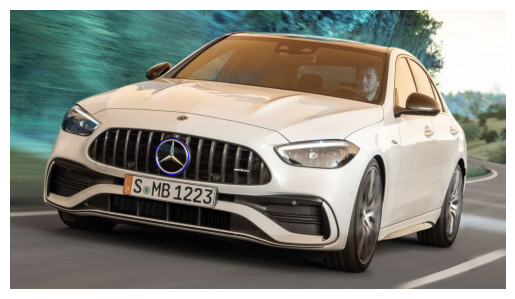

In [44]:
src = cv2.imread('/home/gea/TMS_projects/mers.jpg') 
gr = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gr, 100, 1000)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
closed = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, kernel)

contours = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
sm = cv2.arcLength(contours[3], True)
apd = cv2.approxPolyDP(contours[3], 0.002*sm, True)
#cv2.drawContours(src, [apd], -1, (0,255,0), 10)
cv2.ellipse(src,cv2.fitEllipse(apd),(0,0,255),2)
print(cv2.fitEllipse(apd))

plt.imshow(src)
plt.axis('off')
plt.show()

In [151]:
img_contours = np.uint8(np.zeros((src.shape[0],src.shape[1])))
max=0
sel_countour=None
for countour in contours:
    if countour.shape[0]>max:
        sel_countour=countour
        max=countour.shape[0]

cv2.drawContours(img_contours, [sel_countour], -1, (255,255,255), 1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)